<a href="https://colab.research.google.com/github/emilyswitzer/celeb-heights/blob/main/FinalCelebsHeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import TensorFlow and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Extract and set up the dataset

In [2]:
!unzip "/content/205.zip" -d "/content/205"

Archive:  /content/205.zip
  inflating: /content/205/106/Beetlejuice.jpg  
  inflating: /content/205/106/Billy Barty.jpg  
  inflating: /content/205/106/Danny Woodburn.jpg  
  inflating: /content/205/106/David Rappaport.jpg  
  inflating: /content/205/106/Deep Roy.jpg  
  inflating: /content/205/106/Dylan 'Hornswoggle' Postl.jpg  
  inflating: /content/205/106/Herve Villechaize.jpg  
  inflating: /content/205/106/Jason Acuna.jpg  
  inflating: /content/205/106/Jimmy Vee.jpg  
  inflating: /content/205/106/Kenny Baker.jpg  
  inflating: /content/205/106/Kiran Shah.jpg  
  inflating: /content/205/106/Leigh Gill.jpg  
  inflating: /content/205/106/Martin Klebba.jpg  
  inflating: /content/205/106/Meredith Eaton.jpg  
  inflating: /content/205/106/Peter Dinklage.jpg  
  inflating: /content/205/106/Rusty Goffe.jpg  
  inflating: /content/205/106/Sam Humphrey.jpg  
  inflating: /content/205/106/Verne Troyer.jpg  
  inflating: /content/205/106/Zelda Rubinstein.jpg  
  inflating: /content/205/

In [3]:
import pathlib
import glob
import cv2
images = "/content/205"
images = pathlib.Path(images)

In [4]:
image_number = len(list(images.glob('*/*.jpg')))
print(image_number)

3154


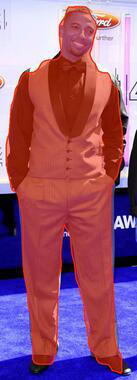

In [40]:
person = list(images.glob('191/*'))
PIL.Image.open(str(person[32]))


# Load data using a Keras utility


## Create a dataset

Using tf.keras.utils.image_dataset_from_directory to generate a dataset from image folders


In [41]:
from keras.callbacks import ModelCheckpoint

In [42]:
batch_size = 8
#img_height = 256
#img_width = 211

img_height = 512
img_width = 509

In [43]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  images,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  #color_mode="grayscale",
  batch_size=batch_size)


Found 3153 files belonging to 67 classes.
Using 2208 files for training.


In [44]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  images,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
 # color_mode="grayscale",
  batch_size=batch_size)

Found 3153 files belonging to 67 classes.
Using 945 files for validation.


In [45]:
class_names = train_ds.class_names
print(class_names)

['106', '109', '111', '114', '116', '119', '121', '125', '127', '129', '130', '132', '139', '146', '147', '148', '149', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '177', '178', '179', '180', '181', '182', '183', '184', '185', '188', '190', '191', '192', '193', '194', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210']


## Visualize the data



In [46]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 512, 509, 3)
(8,)


## Standardize the data

In [47]:
normalization = layers.Rescaling(1./255)

In [48]:
normalized_ds = train_ds.map(lambda x, y: (normalization(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Fix Overfitting

## Data augmentation

In [49]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
  
  ]
)

#Create the model with Overfitting Solutions

In [50]:
num_classes = len(class_names)


model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
 
  
])

In [ ]:
num_classes = len(class_names)


model = Sequential([
  #data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3,padding='same', activation='relu'),
  layers.Conv2D(32, 3,padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3,padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3,padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(num_classes),
])

In [ ]:
checkpoint = ModelCheckpoint('model.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor 

x = list/ array of images
y - list/array of number (height)

## Compile and train the model

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 509, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 512, 509, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 512, 509, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 254, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 254, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 127, 32)     0         
 2D)                                                  

In [52]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
 
 # callbacks=[checkpoint],
  epochs=epochs
)

Epoch 1/100
276/276 [==============================] - 122s 439ms/step - loss: 311.1215 - accuracy: 0.0136 - val_loss: 224.3486 - val_accuracy: 0.0042
Epoch 2/100
276/276 [==============================] - 121s 440ms/step - loss: 197.5210 - accuracy: 0.0077 - val_loss: 179.4256 - val_accuracy: 0.0085
Epoch 3/100
276/276 [==============================] - 122s 444ms/step - loss: 131.2105 - accuracy: 0.0154 - val_loss: 141.2619 - val_accuracy: 0.0212
Epoch 4/100
276/276 [==============================] - 121s 439ms/step - loss: 100.8588 - accuracy: 0.0204 - val_loss: 115.8784 - val_accuracy: 0.0159
Epoch 5/100
276/276 [==============================] - 122s 440ms/step - loss: 77.1568 - accuracy: 0.0177 - val_loss: 103.2358 - val_accuracy: 0.0275
Epoch 6/100
276/276 [==============================] - 122s 440ms/step - loss: 66.0380 - accuracy: 0.0231 - val_loss: 93.0744 - val_accuracy: 0.0222
Epoch 7/100
276/276 [==============================] - 121s 439ms/step - loss: 57.4756 - accuracy

## Visualize training results


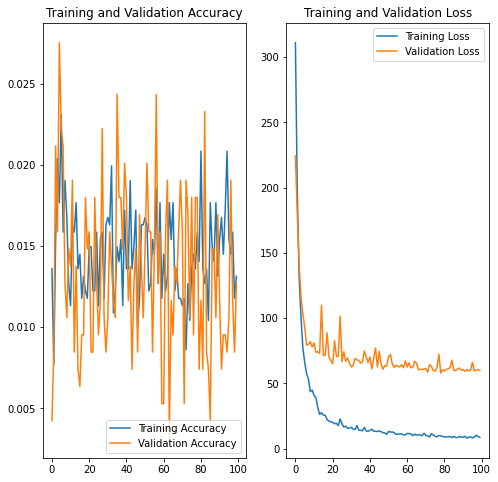

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on unseen data

In [ ]:
!unzip "/content/unseen2.zip" -d "/content/unseen"

Archive:  /content/unseen2.zip
   creating: /content/unseen/content/unseen2/
  inflating: /content/unseen/content/unseen2/139.jpg  
  inflating: /content/unseen/content/unseen2/198.jpg  
  inflating: /content/unseen/content/unseen2/192.jpg  
  inflating: /content/unseen/content/unseen2/157.jpg  
  inflating: /content/unseen/content/unseen2/194.jpg  
  inflating: /content/unseen/content/unseen2/179.jpg  
  inflating: /content/unseen/content/unseen2/155.jpg  
  inflating: /content/unseen/content/unseen2/206.jpg  
  inflating: /content/unseen/content/unseen2/153.jpg  
  inflating: /content/unseen/content/unseen2/148.jpg  
  inflating: /content/unseen/content/unseen2/166.jpg  
  inflating: /content/unseen/content/unseen2/106.jpg  
  inflating: /content/unseen/content/unseen2/201.jpg  
  inflating: /content/unseen/content/unseen2/189.jpg  
  inflating: /content/unseen/content/unseen2/109.jpg  
  inflating: /content/unseen/content/unseen2/161.jpg  
  inflating: /content/unseen/content/unseen

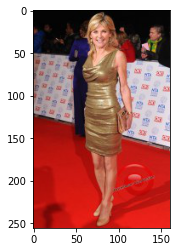

The person is 2.30 percent 173 cm 


In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/167.jpg')
imgplot = plt.imshow(img)
plt.show()
sunflower_path = '/content/167.jpg'

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])




print(
    "The person is {:.2f} percent {} cm "
    .format(100 * np.max(score),class_names[np.argmax(score)])
)

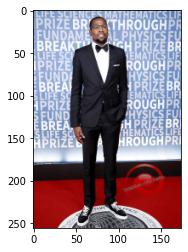

The person is 2.14 percent 165 cm 


In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/207.jpg')
imgplot = plt.imshow(img)
plt.show()
sunflower_path = '/content/207.jpg'

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])




print(
    "The person is {:.2f} percent {} cm "
    .format(100 * np.max(score),class_names[np.argmax(score)])
)